# CDR Experiments via Pymagicc
##### CC-BY 4.0 2020 @safiume

In [1]:
# NBVAL_IGNORE_OUTPUT
import sys
from os import listdir
from os.path import join, dirname
import re
from pprint import pprint
import expectexception
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
%matplotlib inline
import f90nml

In [2]:
#Disable warning supression if running locally
import warnings
warnings.simplefilter("ignore", category=Warning, lineno=0, append=False)

In [3]:
import pymagicc
from pymagicc import MAGICC6
from pymagicc.io import MAGICCData, read_cfg_file, NoReaderWriterError
from pymagicc.scenarios import ( rcp26, rcp45, rcps )
print(pymagicc.__version__)
print(sys.version)
rcp26.__class__.__bases__

<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler


2.0.0b14+19.g3c7f351.dirty
3.7.4 (v3.7.4:e09359112e, Jul  8 2019, 14:54:52) 
[Clang 6.0 (clang-600.0.57)]


(scmdata.dataframe.ScmDataFrame,)

In [4]:
## list declines to run
declines = ["emax", "lmax", "emin", "lmin"]
SCEN_DIR = "SCEN"
MAGICC6_DIR = join("..", "CDRRUN")

##Start of Magic settings
magcfg = { "startyear" : 1765,
          "endyear" : 2500,
          "core_climatesensitivity" : 3,
          "co2_tempfeedback_yrstart" : 2005,
          "co2_fertilization_yrstart" : 2005,
          "co2_switchfromconc2emis_year" : 2005,
          "rf_mhalo_constantafteryr" : 2500,
          "rf_fgas_constantafteryr" : 2500,
          "out_forcing" : 1,
          "out_emissions" : 1,
          "out_concentrations" : 1 }
### End MAGICC Settings

Import IMAGE-SSP1-1.9 from manually imported SCEN built from 
"IMAGE 3.0.1","SSP1-19","World","Diagnostics|MAGICC6|Harmonized Input|*

© IAMC 1.5°C Scenario Explorer hosted by IIASA https://data.ene.iiasa.ac.at/iamc-1.5c-explorer

There are some artifacts in the dataset and subsequent graphs as the download was missing the full fgasses and halo gasses.

In [5]:
for name in (declines):
    declinefile = join(SCEN_DIR, "ONC" + name + ".SCEN")
    oncdata = MAGICCData(declinefile,
                             columns={"model": ["CDRex"], "scenario": [name]}, inplace=True)
    rcps = rcps.append(oncdata)
img119 = MAGICCData(join(SCEN_DIR, 'imgs119.SCEN'), 
                    columns={"model": ["IMAGE"], "scenario": ['SSP119']}, inplace=True)
rcps = rcps.append(img119)
print(rcps["scenario"].unique())
#image119 = image119.assign(region='WORLD').set_index('climate_model', append=True)
rcps.filter(scenario='SSP119').timeseries().head(3)

['RCP26' 'SSP119' 'emax' 'emin' 'lmax' 'lmin']


time                                                                                            2005-01-01 00:00:00  \
model scenario region variable                                   unit       climate_model todo                        
IMAGE SSP119   World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr  unspecified   SET                1.1964   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr  unspecified   SET                7.9768   
                      Emissions|BC                               Mt BC / yr unspecified   SET                8.2512   

time                                                                                            2010-01-01 00:00:00  \
model scenario region variable                                   unit       climate_model todo                        
IMAGE SSP119   World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr  unspecified   SET                1.0446   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr  unspecified   SET                8.9321   
                      Emissions|BC                               Mt BC / yr unspecified   SET                8.0345   

time                                                                                            2020-01-01 00:00:00  \
model scenario region variable                                   unit       climate_model todo                        
IMAGE SSP119   World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr  unspecified   SET                0.7900   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr  unspecified   SET                8.4917   
                      Emissions|BC                               Mt BC / yr unspecified   SET                5.4914   

time                                                                                            2030-01-01 00:00:00  \
model scenario region variable                                   unit       climate_model todo                        
IMAGE SSP119   World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr  unspecified   SET                0.1870   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr  unspecified   SET                4.8623   
                      Emissions|BC                               Mt BC / yr unspecified   SET                2.7969   

time                                                                                            2040-01-01 00:00:00  \
model scenario region variable                                   unit       climate_model todo                        
IMAGE SSP119   World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr  unspecified   SET                0.3142   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr  unspecified   SET                1.5091   
                      Emissions|BC                               Mt BC / yr unspecified   SET                2.7123   

time                                                                                            2050-01-01 00:00:00  \
model scenario region variable                                   unit       climate_model todo                        
IMAGE SSP119   World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr  unspecified   SET               -0.1752   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr  unspecified   SET                0.4394   
                      Emissions|BC                               Mt BC / yr unspecified   SET                2.5381   

time                                                                                            2060-01-01 00:00:00  \
model scenario region variable                                   unit       climate_model todo                        
IMAGE SSP119   World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr  unspecified   SET               -0.3638   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt

# Scenarios

The five RCP scenarios and experimental declines are loaded as DataFrames in pyhector. They contain the following emissions:

In [6]:
print(rcps["scenario"].unique())
rcps.filter(scenario="SSP119").timeseries().head(5)

['RCP26' 'SSP119' 'emax' 'emin' 'lmax' 'lmin']


time                                                                                             2005-01-01 00:00:00  \
model scenario region variable                                   unit        climate_model todo                        
IMAGE SSP119   World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   unspecified   SET                1.1964   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   unspecified   SET                7.9768   
                      Emissions|BC                               Mt BC / yr  unspecified   SET                8.2512   
                      Emissions|CH4                              Mt CH4 / yr unspecified   SET              346.4720   
                      Emissions|CO                               Mt CO / yr  unspecified   SET             1061.5255   

time                                                                                             2010-01-01 00:00:00  \
model scenario region variable                                   unit        climate_model todo                        
IMAGE SSP119   World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   unspecified   SET                1.0446   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   unspecified   SET                8.9321   
                      Emissions|BC                               Mt BC / yr  unspecified   SET                8.0345   
                      Emissions|CH4                              Mt CH4 / yr unspecified   SET              372.1805   
                      Emissions|CO                               Mt CO / yr  unspecified   SET             1048.8921   

time                                                                                             2020-01-01 00:00:00  \
model scenario region variable                                   unit        climate_model todo                        
IMAGE SSP119   World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   unspecified   SET                0.7900   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   unspecified   SET                8.4917   
                      Emissions|BC                               Mt BC / yr  unspecified   SET                5.4914   
                      Emissions|CH4                              Mt CH4 / yr unspecified   SET              318.1089   
                      Emissions|CO                               Mt CO / yr  unspecified   SET              809.0550   

time                                                                                             2030-01-01 00:00:00  \
model scenario region variable                                   unit        climate_model todo                        
IMAGE SSP119   World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   unspecified   SET                0.1870   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   unspecified   SET                4.8623   
                      Emissions|BC                               Mt BC / yr  unspecified   SET                2.7969   
                      Emissions|CH4                              Mt CH4 / yr unspecified   SET              227.5445   
                      Emissions|CO                               Mt CO / yr  unspecified   SET              517.5331   

time                                                                                             2040-01-01 00:00:00  \
model scenario region variable                                   unit        climate_model todo                        
IMAGE SSP119   World  Emissions|CO2|MAGICC AFOLU                 Gt C / yr   unspecified   SET                0.3142   
                      Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr   unspecified   SET                1.5091   
                      Emissions|BC                               Mt BC / yr  unspecified   SET                2.7123   
                      Emissions|CH4 

In [7]:
rcp26.head(2)

time                                                                                                  2000-01-01 00:00:00  \
model scenario region        variable                                   unit      climate_model todo                        
IMAGE RCP26    World|Bunkers Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET                   0.0   
                             Emissions|CO2|MAGICC AFOLU                 Gt C / yr unspecified   SET                   0.0   

time                                                                                                  2001-01-01 00:00:00  \
model scenario region        variable                                   unit      climate_model todo                        
IMAGE RCP26    World|Bunkers Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET                   0.0   
                             Emissions|CO2|MAGICC AFOLU                 Gt C / yr unspecified   SET                   0.0   

time                                                                                                  2002-01-01 00:00:00  \
model scenario region        variable                                   unit      climate_model todo                        
IMAGE RCP26    World|Bunkers Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET                   0.0   
                             Emissions|CO2|MAGICC AFOLU                 Gt C / yr unspecified   SET                   0.0   

time                                                                                                  2003-01-01 00:00:00  \
model scenario region        variable                                   unit      climate_model todo                        
IMAGE RCP26    World|Bunkers Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET                   0.0   
                             Emissions|CO2|MAGICC AFOLU                 Gt C / yr unspecified   SET                   0.0   

time                                                                                                  2004-01-01 00:00:00  \
model scenario region        variable                                   unit      climate_model todo                        
IMAGE RCP26    World|Bunkers Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET                   0.0   
                             Emissions|CO2|MAGICC AFOLU                 Gt C / yr unspecified   SET                   0.0   

time                                                                                                  2005-01-01 00:00:00  \
model scenario region        variable                                   unit      climate_model todo                        
IMAGE RCP26    World|Bunkers Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET                   0.0   
                             Emissions|CO2|MAGICC AFOLU                 Gt C / yr unspecified   SET                   0.0   

time                                                                                                  2006-01-01 00:00:00  \
model scenario region        variable                                   unit      climate_model todo                        
IMAGE RCP26    World|Bunkers Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET                   0.0   
                             Emissions|CO2|MAGICC AFOLU                 Gt C / yr unspecified   SET                   0.0   

time                                                                                                  2007-01-01 00:00:00  \
model scenario region        variable                                   unit      climate_model todo                        
IMAGE RCP26    World|Bunkers Emissions|CO2|MAGICC Fossil and Industrial Gt C / yr unspecified   SET                   0.0   
                             Emissions|CO2|MAGICC AFOLU                 Gt C / yr unspecified   SET                   

They are split up in regions:

In [8]:
rcp26["region"].unique()

array(['World|Bunkers', 'World|R5LAM', 'World|R5MAF', 'World|R5ASIA',
       'World|R5REF', 'World|R5OECD', 'World'], dtype=object)

They have the following units:

In [9]:
#pymagicc.units
rcps[["variable", "unit"]].drop_duplicates()
rcp26[["variable", "unit"]].iloc[0]

variable    Emissions|CO2|MAGICC Fossil and Industrial
unit                                         Gt C / yr
Name: 0, dtype: object

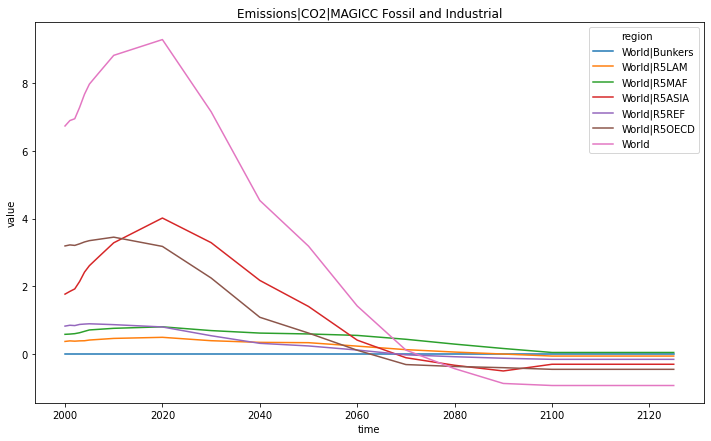

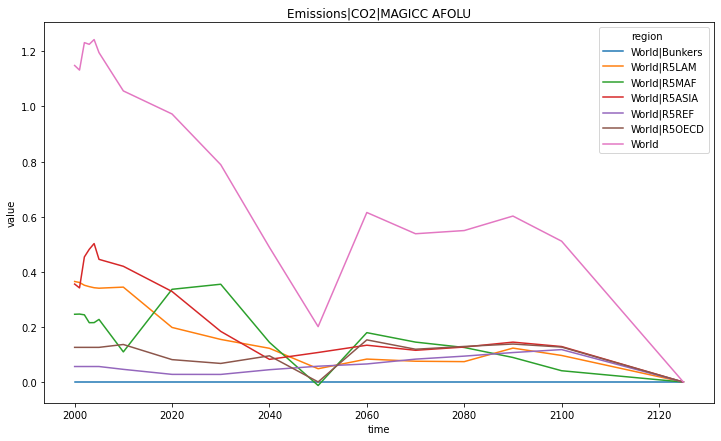

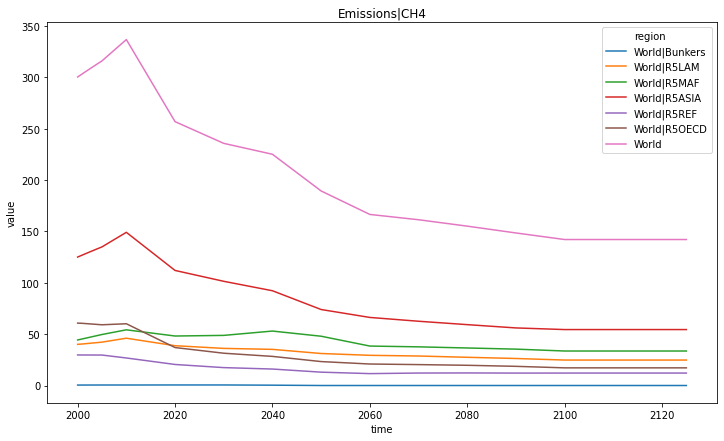

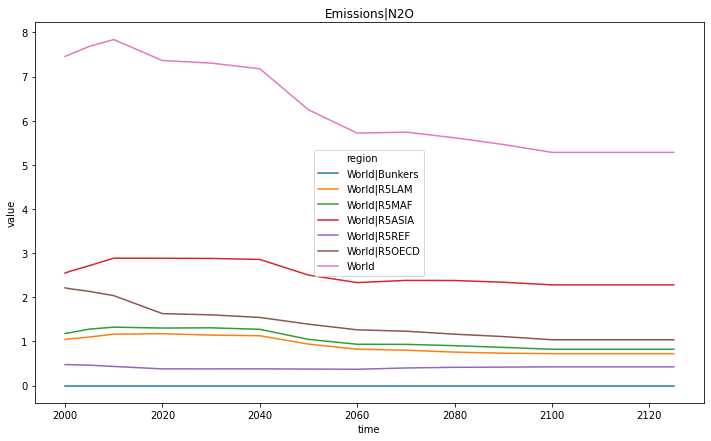

In [10]:
categories_to_plot = [
    "Emissions|" + v 
    for v in ["CO2|MAGICC Fossil and Industrial", "CO2|MAGICC AFOLU", "CH4", "N2O"]
]
for g in rcp26.filter(
    variable=categories_to_plot,
    year=range(1000, 2150)
).groupby("variable"):
    plt.figure(figsize=(12, 7))
    g.lineplot(hue="region").set_title(g.get_unique_meta("variable", True))

# Fossil fuel emissions for the five RCP scenarios and Experimental Declines.

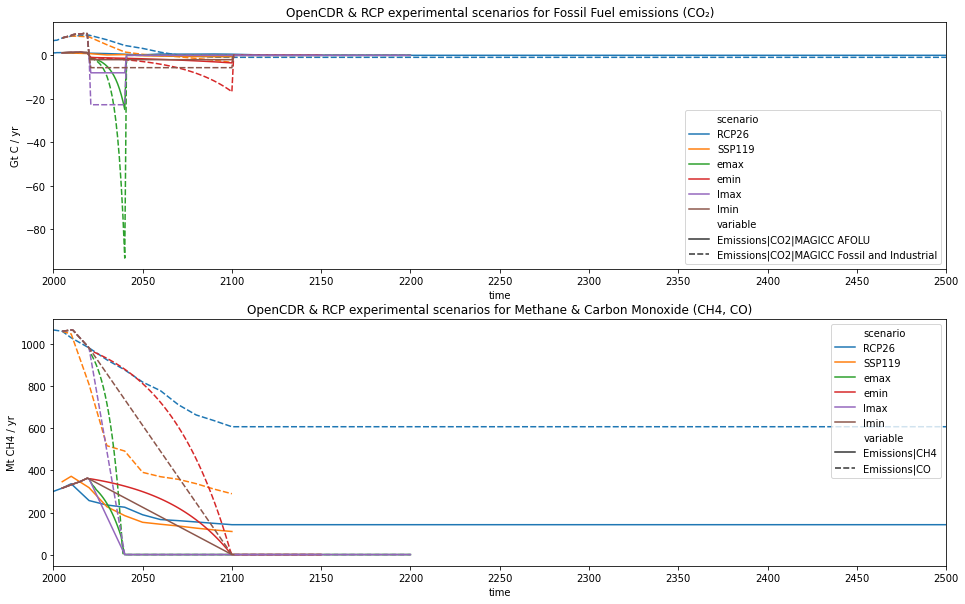

In [11]:
x = (datetime(2000, 1, 1), datetime(magcfg["endyear"], 1, 1))
pret="OpenCDR & RCP experimental scenarios for "
gtgvar = "*CO2|MAGICC Fossil and Industrial", "*CO2|MAGICC AFOLU*"
mtgvar = "*Emissions|CH4", "*Emissions|CO"
list = [gtgvar,mtgvar]
title = [pret + "Fossil Fuel emissions (CO₂)", 
         pret + "Methane & Carbon Monoxide (CH4, CO)"]

fig, axes = plt.subplots(2,1, figsize = (16, 10))
for n,var in enumerate(list):
    varun = var[(n-1)]
    test = rcps.filter(region="World", variable=var).lineplot(hue="scenario", style="variable", ax=axes[n])
    ylab = rcps.filter(region="World", variable=varun)["unit"].iloc[[0]].all()
    axes[n].set_ylabel(ylab)
    axes[n].set_title(title[n])
    axes[n].set_xlim(x)

## Running MAGICC

A single `pymagicc` run doesn't take long and returns a Pandas Dict.
(If not on Windows, the very first run might be slower due to setting up Wine.)

In [12]:
%time results = pymagicc.run(rcp26)
results = ""
%time results = pymagicc.run(rcps.filter(scenario="emin"), **magcfg)
results = ""
%time results = pymagicc.run(rcp26, **magcfg)
slice = results.filter(region="World",variable="Radiative Forcing")["unit"].head(3)

CPU times: user 854 ms, sys: 77.3 ms, total: 931 ms
Wall time: 7.03 s
CPU times: user 4.45 s, sys: 548 ms, total: 5 s
Wall time: 11.1 s
CPU times: user 4.15 s, sys: 548 ms, total: 4.7 s
Wall time: 10.8 s


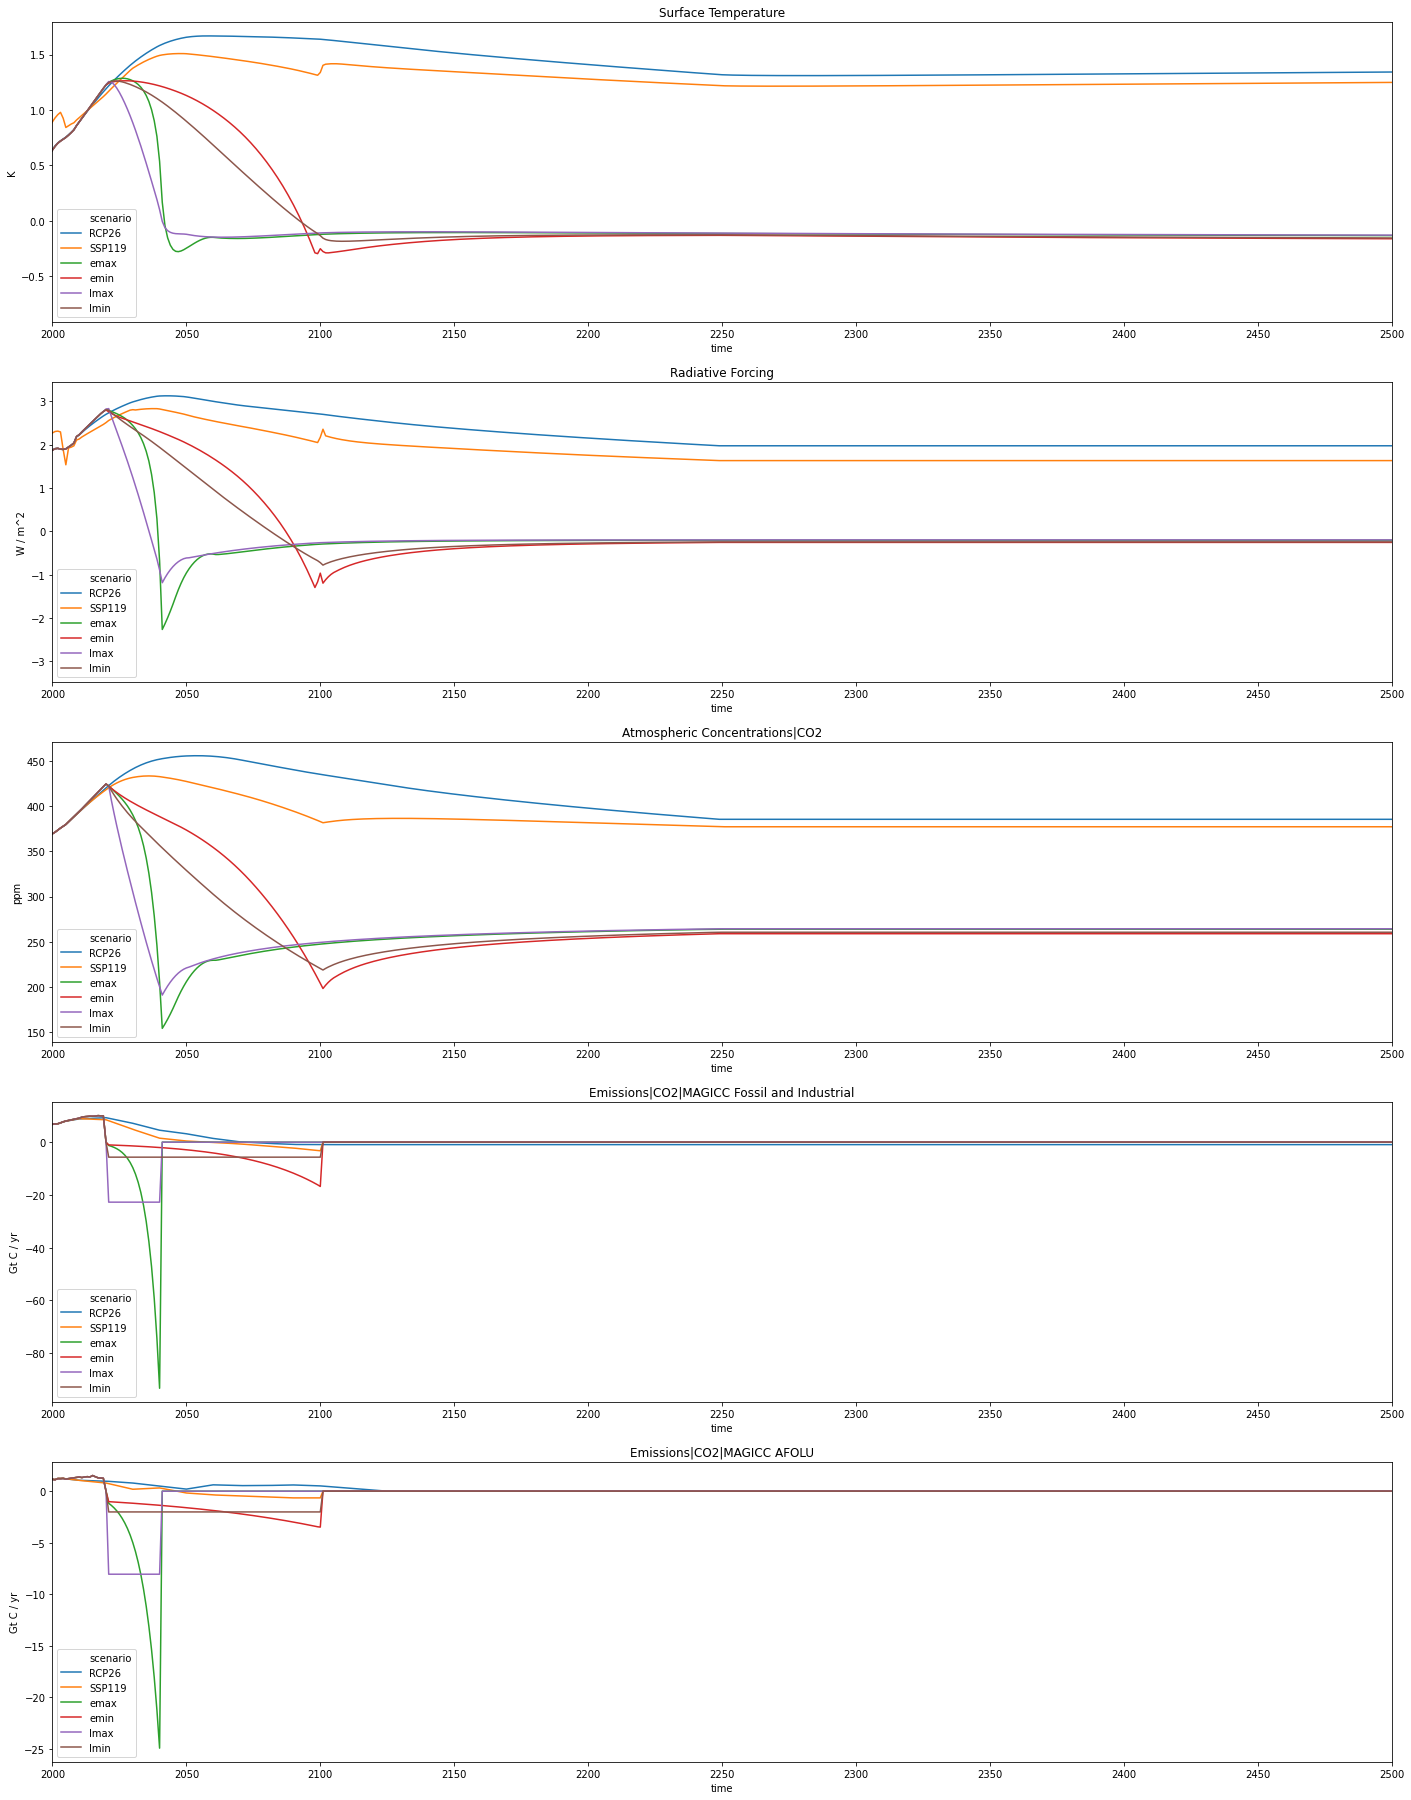

In [13]:
vars = ["Surface Temperature","Radiative Forcing",
        "Atmospheric Concentrations|CO2","Emissions|CO2|MAGICC Fossil and Industrial",
        "Emissions|CO2|MAGICC AFOLU"]
x = (datetime(2000, 1, 1), datetime(magcfg["endyear"], 1, 1))
fig, axes = plt.subplots((len(vars)), 1, figsize=(24, 32))

for sdf in rcps["scenario"].unique():
    results = results.append(pymagicc.run(MAGICCData(rcps.filter(scenario=sdf)), **magcfg))
for n, var in enumerate(vars):
    results.filter(region="World", variable=var).lineplot(hue="scenario", ax=axes[n])
    ylab = results.filter(region="World", variable=var)["unit"].iloc[[0]].all()
    axes[n].set_ylabel(ylab)
    axes[n].set_title(var)
    axes[n].set_xlim(x)


The default parameters are the ones that were used to produce the RCP GHG concentrations (see also http://live.magicc.org/). Of course it's easy to change them.

In [14]:
low = pymagicc.run(rcp45, core_climatesensitivity=1.5, endyear=magcfg["endyear"])
default = pymagicc.run(rcp45, core_climatesensitivity=3, endyear=magcfg["endyear"])
high = pymagicc.run(rcp45, core_climatesensitivity=4.5, endyear=magcfg["endyear"])

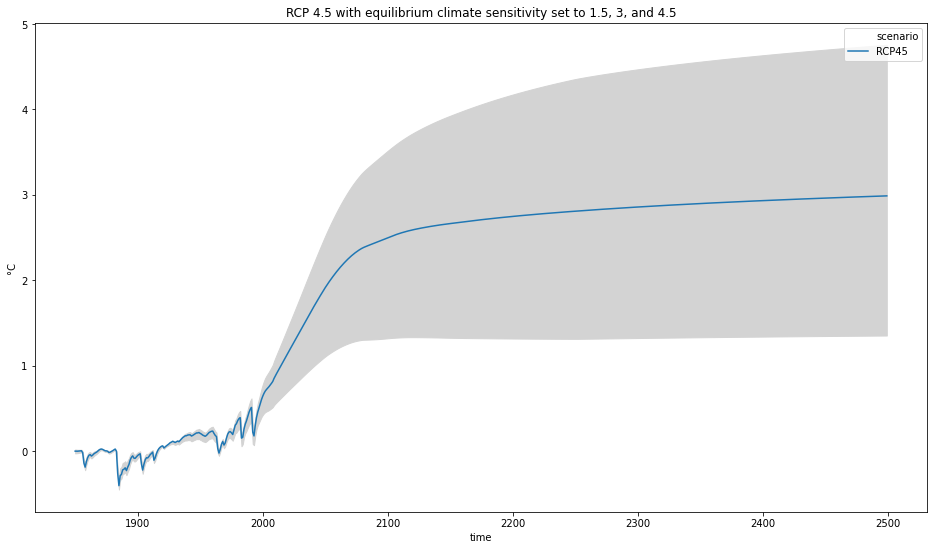

In [15]:
filtering = {
    "variable": "Surface Temperature",
    "region": "World",
    "year": range(1850, magcfg["endyear"]),
}

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
default.filter(**filtering).line_plot(x="time", ax=ax)
plt.fill_between(
    low.filter(**filtering)["time"].values,
    low.filter(**filtering).timeseries().values.squeeze(),
    high.filter(**filtering).timeseries().values.squeeze(),
    color="lightgray"
)

plt.title(
    "RCP 4.5 with equilibrium climate sensitivity set to 1.5, 3, and 4.5"
)
plt.ylabel("°C");